# Notebook #2: Encoding

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../../..")
from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se
from src import soporte_asunciones as sa

- Importamos el dataframe generado en el notebook anterior.

In [2]:
df = pd.read_pickle('../../../../datos/cluster1/modelo1/df_sinnulos.pkl')
df.head()

,Ship Mode,Segment,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Profit,Order Priority
2,First Class,Home Office,Germany,EU,Central,Technology,Phones,5,0.1,-96.5400,Medium
6,Second Class,Corporate,United States,US,South,Office Supplies,Supplies,5,0.0,83.2810,High
8,Same Day,Home Office,Brazil,LATAM,South,Furniture,Chairs,7,0.0,622.0200,Critical
18,First Class,Home Office,United States,US,West,Technology,Phones,8,0.2,363.9048,High
27,Standard Class,Home Office,India,APAC,Central Asia,Technology,Phones,7,0.0,632.5200,High


- En total, tenemos 8 variables respuesta categóricas.

In [3]:
lista_col_categ = df.select_dtypes(include="O").columns.tolist()
lista_col_categ

['Ship Mode',
 'Segment',
 'Country',
 'Market',
 'Region',
 'Category',
 'Sub-Category',
 'Order Priority']

- Tal y como hemos hecho en el EDA, recordemos la relación entre la variable respuesta (Profit) y el resto de las variables categóricas.

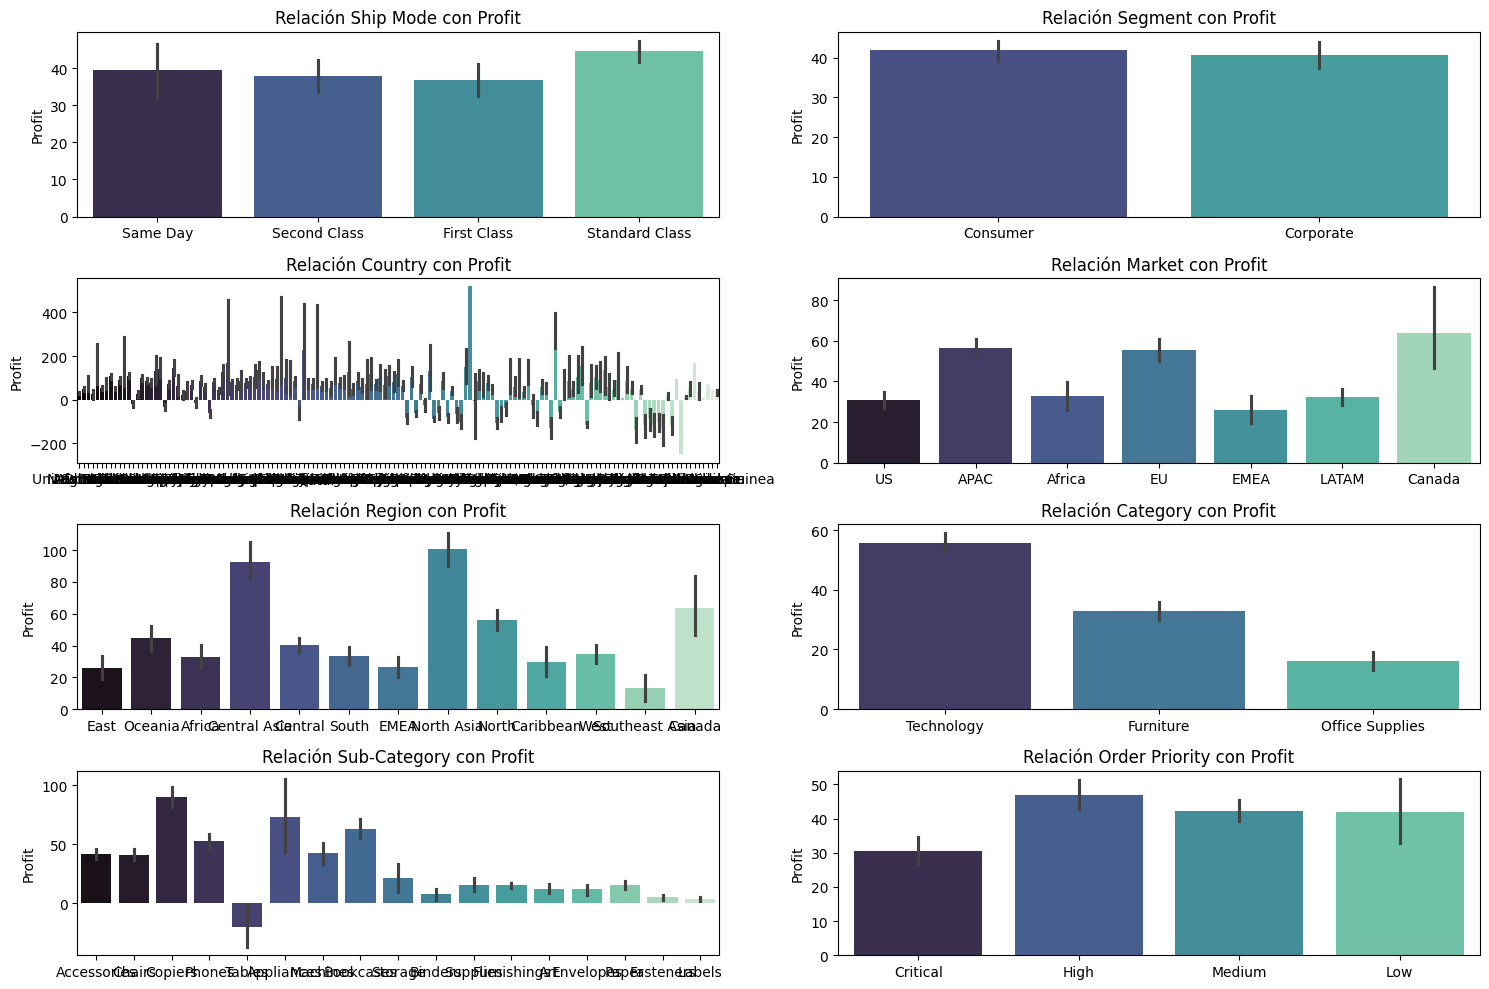

In [4]:
sa.visualizar_categorias(df, lista_col_categ, "Profit", tipo_grafica="barplot")

- Vemos que, excepto en el caso de Segment, el resto de features tienen una relación con la variable respuesta y diferencias importante. Hemos explicado con detalle una gráfica similar en el EDA. Aún así, sabemos, para comprobarlo, tenermos a nuestra disposición tests estadísticos.

### Diferencias entre categorías y orden
- Vamos entonces a comprobar la normalidad y homocedasticidad, con el fin de identificar si son o no paramétricas, y comprobar diferencias.

- Para evaluar si hay diferencias entre las categorías de nuestras variables predictoras categóricas y dónde se encuentran, utilizaremos los tests de Mann-Whitney (VR con 2 categorías) y Kruskal (VR con más de categorías).

In [5]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = sa.Asunciones(dataframe = df, columna_numerica = "Profit")
print("\n-------------\n")

for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la normalidad
    asunciones.identificar_normalidad(metodo = "k") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "Profit", categoria)
    test.run_all_tests()
    print("\n-------------\n")


-------------

Estamos analizando la variable SHIP MODE
Para la columna Profit, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Ship Mode las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Same Day', 'Second Class', 'First Class', 'Standard Class']

Realizando test de K...
Estadístico de prueba: 33.66393876956193
Valor p: 2.332710440888833e-07
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
2,7.7839,0.0299,0.5256,15.0423,First Class-Standard Class



-------------

Estamos analizando la variable SEGMENT
Para la columna Profit, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Segment las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Consumer', 'Corporate']

Realizando test de M...
Estadístico del Test de Mann-Whitney U: 37712164.0
Valor p: 0.9024310478417794
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable COUNTRY
Para la columna Profit, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Country las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['United States', 'Australia', 'Senegal', 'New Zealand', 'Afghanistan', 'France', 'Poland', 'China', 'Mexico', 'El Salvador', 'Taiwan', 'India', 'Dominican Republic', 'Indonesia', 'United Kingdom', 'Germany', 'Iran', 'Mozambique', 'Bangladesh', 'Philippines', 'Spain', 'Malaysia', 'Ecuador', 'Italy', 'Somalia', 'Guatemala', 'Thailand', 'Ukraine', 'Egypt', 'Argentina', 'Nicaragua', 'Brazil', 'Austria', 'Lesotho', 'Cuba', 'Romania', 'Cameroon', 'South Africa', 'Singapore', 'Angola', 'Japan', 'Finland', 'Colombia', 'Ghana', 'Hungary', 'Liberia', 'Georgia', 'Albania', 'Russia', 'Pakistan', 'Namibia', 'Morocco', 'Saudi Arabia', 'Qatar', 'Democratic Republic of the Congo', 'Tanzania', 'Republic of the Congo', 'Norway', 'Iraq', 'Al

,meandiff,p-adj,lower,upper,group_diff
3,-217.4018,0.0000,-349.6893,-85.1143,Afghanistan-Argentina
31,-242.1151,0.0000,-415.4021,-68.8282,Afghanistan-Denmark
32,-175.9480,0.0000,-304.9386,-46.9574,Afghanistan-Dominican Republic
49,-222.4154,0.0000,-371.5054,-73.3254,Afghanistan-Haiti
50,-219.7606,0.0000,-348.4918,-91.0295,Afghanistan-Honduras
...,...,...,...,...,...
10124,-215.0005,0.0000,-359.2878,-70.7132,United Kingdom-Zimbabwe
10127,-91.2460,0.0001,-162.3371,-20.1549,United States-Venezuela
10131,-147.7564,0.0251,-290.0758,-5.4371,United States-Zimbabwe
10145,136.2628,0.0036,16.0435,256.4821,Venezuela-Zambia



-------------

Estamos analizando la variable MARKET
Para la columna Profit, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Market las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['US', 'APAC', 'Africa', 'EU', 'EMEA', 'LATAM', 'Canada']

Realizando test de K...
Estadístico de prueba: 190.3979221561316
Valor p: 2.0939881301001854e-38
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-23.6515,0.0,-36.1252,-11.1777,APAC-Africa
2,-30.2868,0.0,-42.1970,-18.3766,APAC-EMEA
4,-24.2188,0.0,-33.2764,-15.1613,APAC-LATAM
5,-25.5896,0.0,-34.8643,-16.3149,APAC-US
8,22.7099,0.0,9.7315,35.6883,Africa-EU
15,29.3452,0.0,16.9074,41.7830,EMEA-EU
18,-23.2772,0.0,-33.0181,-13.5364,EU-LATAM
19,-24.6480,0.0,-34.5911,-14.7049,EU-US



-------------

Estamos analizando la variable REGION
Para la columna Profit, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Region las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['East', 'Oceania', 'Africa', 'Central Asia', 'Central', 'South', 'EMEA', 'North Asia', 'North', 'Caribbean', 'West', 'Southeast Asia', 'Canada']

Realizando test de K...
Estadístico de prueba: 584.5291890287708
Valor p: 2.1294483618763267e-117
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
3,59.9035,0.0000,39.8323,79.9748,Africa-Central Asia
6,23.3427,0.0002,7.0085,39.6769,Africa-North
7,67.8779,0.0000,48.1882,87.5676,Africa-North Asia
10,-19.2948,0.0211,-37.1769,-1.4126,Africa-Southeast Asia
21,-50.3949,0.0180,-96.5076,-4.2822,Canada-Southeast Asia
24,63.0068,0.0000,38.7015,87.3120,Caribbean-Central Asia
27,26.4459,0.0028,5.1223,47.7696,Caribbean-North
28,70.9811,0.0000,46.9900,94.9723,Caribbean-North Asia
33,52.2655,0.0000,34.5577,69.9732,Central-Central Asia
34,-14.2734,0.0276,-27.7961,-0.7507,Central-EMEA



-------------

Estamos analizando la variable CATEGORY
Para la columna Profit, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Category las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Technology', 'Furniture', 'Office Supplies']

Realizando test de K...
Estadístico de prueba: 392.5929217670596
Valor p: 5.617333662000554e-86
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-16.8562,0.0,-24.9443,-8.7681,Furniture-Office Supplies
1,22.9260,0.0,17.8098,28.0422,Furniture-Technology
2,39.7822,0.0,31.7169,47.8476,Office Supplies-Technology



-------------

Estamos analizando la variable SUB-CATEGORY
Para la columna Profit, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Sub-Category las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Accessories', 'Chairs', 'Copiers', 'Phones', 'Tables', 'Appliances', 'Machines', 'Bookcases', 'Storage', 'Binders', 'Supplies', 'Furnishings', 'Art', 'Envelopes', 'Paper', 'Fasteners', 'Labels']

Realizando test de K...
Estadístico de prueba: 895.7593887283804
Valor p: 2.24308104165176e-180
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
1,-29.3189,0.0417,-58.1716,-0.4662,Accessories-Art
2,-34.1925,0.0006,-60.0175,-8.3674,Accessories-Binders
3,21.1176,0.0000,6.7870,35.4482,Accessories-Bookcases
5,48.2537,0.0000,33.5825,62.9250,Accessories-Copiers
8,-26.4271,0.0000,-39.6703,-13.1839,Accessories-Furnishings
...,...,...,...,...,...
125,-62.3046,0.0000,-85.5334,-39.0757,Machines-Tables
126,36.9075,0.0070,5.0322,68.7828,Paper-Phones
130,-31.2188,0.0108,-58.9538,-3.4837,Phones-Storage
132,-72.2462,0.0000,-93.0488,-51.4436,Phones-Tables



-------------

Estamos analizando la variable ORDER PRIORITY
Para la columna Profit, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Order Priority las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Critical', 'High', 'Medium', 'Low']

Realizando test de K...
Estadístico de prueba: 97.1091194445564
Valor p: 6.50126436877048e-21
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,16.3490,0.0000,8.2443,24.4536,Critical-High
2,11.7568,0.0002,4.4718,19.0419,Critical-Medium



-------------



- De los test, hemos identificado:

> Variables con diferencias significativas
- Ship Mode, Country, Market, Region, Category, Sub-Category y Order Priority

> Variables sin diferencias significativas
- Segment 

In [4]:
visual_encoding = sa.Analisis_Visual_Encoding(df, lista_col_categ, "Profit")

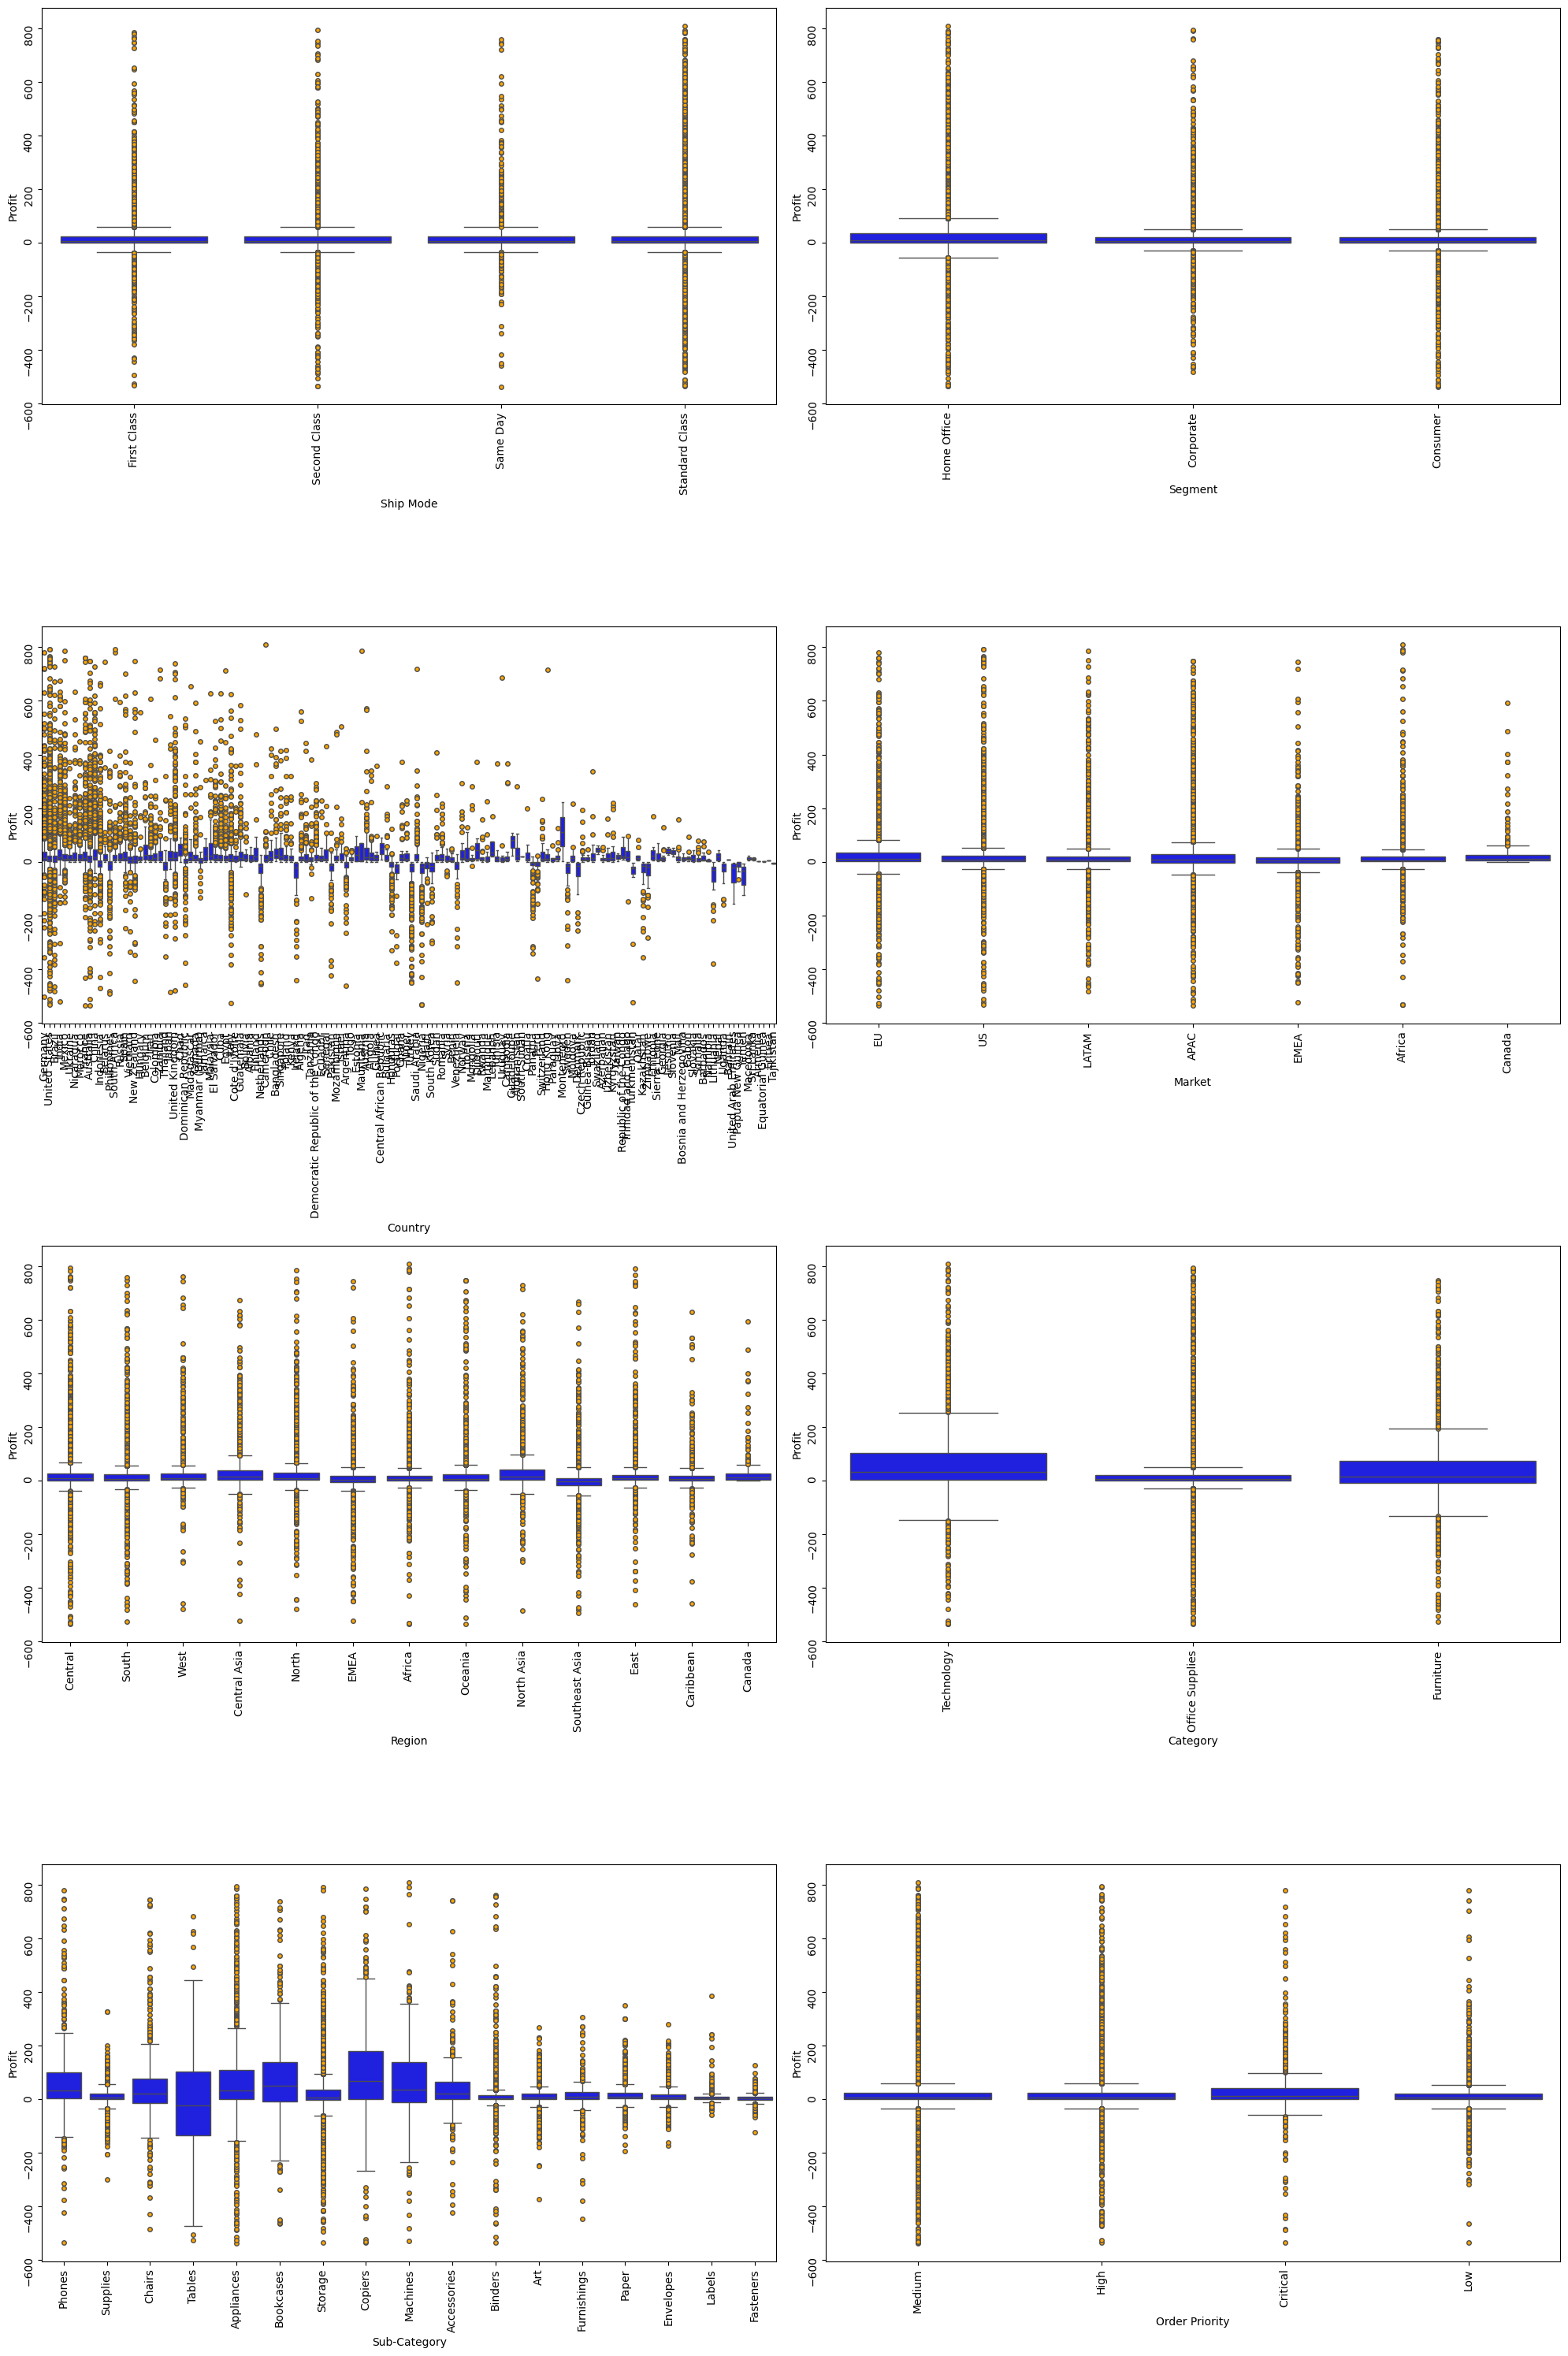

In [5]:
visual_encoding.crear_boxplot(tamano_grafica=(20, 30))

- Con ayuda de los tests y las visualizaciones, hemos identificado que existen diferencias significativas entre las categorías de todas las variables categóricas, por sus p-valores <0,05, con la única excepción de Segment.

- Por no existir diferencias, vamos a eliminar la variable segment de nuestro modelo.

In [6]:
df.drop(columns = "Segment", inplace= True)
df.reset_index(drop=True, inplace=True)

- Nos quedamos entonces con 7 features categóricas, a las que aplicaremos el Target Encoder. Nos decantamos por esta opción dado el gran número de categorías que tenemos en muchas de nuestras features, además de que, nos interesa relacionarlas con la variable respuesta, en este caso, el beneficio.

- Usaremos un diccionario del que "beberá" la clase "Encoding", para saber qué modelo aplicar.

In [7]:
diccionario_encoding = {
    "onehot": [],
    "dummies": [],
    "ordinal": {},
    "label": [],
    "frequency": [],
    "target": ['Ship Mode', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority'],
    "catboost": []
}

- Instanciamos la clase y aplicamos el encoder elegido.

- Es conocido que, el Target Encoder puede generar overfitting.

- Tenemos también a disposición el CatBoost Encoder, que es una técnica de codificación similar al Target Encoder, pero mejora el manejo del overfitting. Está diseñado específicamente para problemas supervisados y utiliza un enfoque basado en medias condicionadas a la variable objetivo (como el Target). Para cada fila, excluye su propio target al calcular la media de su categoría, reduciendo la “fuga” de información entre entrenamiento y prueba, reduciendo el overfitting. Similar al Target, es ideal para manejar variables con muchas categorías únicas.

 - En esta primera iteración, nos quedaremos con el Target.

In [8]:
encoding = se.Encoding(dataframe=df, diccionario_encoding=diccionario_encoding, variable_respuesta="Profit")

In [9]:
df_encoded, encoder = encoding.target_encoding()
df_encoded.head()

,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority
0,-96.5400,18.144652,34.557165,25.847096,21.591716,62.629774,62.044307,5,0.1,19.484122
1,83.2810,19.359450,21.648691,21.648691,16.231600,15.716697,9.696875,5,0.0,18.944620
2,622.0200,22.220662,15.185094,16.720197,16.231600,38.094237,44.833869,7,0.0,33.470448
3,363.9048,18.144652,21.648691,21.648691,26.827045,62.629774,62.044307,8,0.2,18.944620
4,632.5200,19.602192,44.849984,21.959525,35.467384,62.629774,62.044307,7,0.0,18.944620


- Guardamos el dataframe que llevaremos al siguiente notebook, donde gestionaremos los outliers. Guardaremos también el objeto de encoding.

In [10]:
with open('../../../../datos/cluster1/modelo1/df_encoded.pkl', 'wb') as f:
    pickle.dump(df_encoded, f)

In [12]:
with open('../../../../transformers/cluster1_encoder.pkl', 'wb') as f:
     pickle.dump(encoder, f)